In [68]:
import pandas as pd
import numpy as np
import sqlite3

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

In [69]:
con = sqlite3.connect("data/database.sqlite")

sql_rows = pd.read_sql_query("SELECT COUNT(*) FROM Reviews", con).iloc[0, 0]

con.close()

print(sql_rows)

568454


In [70]:
con = sqlite3.connect("data/database.sqlite")

df_head = pd.read_sql_query("SELECT * FROM Reviews LIMIT 10", con)

con.close()

In [71]:
df_head

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [72]:
con = sqlite3.connect("data/database.sqlite")

df_text_50 = pd.read_sql_query("SELECT Text FROM Reviews LIMIT 50", con)

con.close()

In [73]:
df_text_50.values

array([['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'],
       ['Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'],
       ['This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.']

In [131]:
con = sqlite3.connect("data/database.sqlite")

df = pd.read_sql_query(
    "SELECT HelpfulnessNumerator AS helpful, \
            (HelpfulnessDenominator - HelpfulnessNumerator) AS not_helpful, \
            CASE WHEN Score > 3 THEN 1 \
                ELSE 0 END AS score, \
            Summary AS summary, \
            Text AS text \
    FROM Reviews;", con)

con.close()

In [132]:
df.head()

,helpful,not_helpful,score,summary,text
0,1,0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,0,1,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,0,0,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,1,Great taffy,Great taffy at a great price. There was a wid...


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   helpful      568454 non-null  int64 
 1   not_helpful  568454 non-null  int64 
 2   score        568454 non-null  int64 
 3   summary      568454 non-null  object
 4   text         568454 non-null  object
dtypes: int64(3), object(2)
memory usage: 21.7+ MB


In [134]:
df.describe()

,helpful,not_helpful,score
count,568454.000000,568454.000000,568454.000000
mean,1.743817,0.484993,0.780674
std,7.636513,1.905591,0.413791
min,0.000000,-2.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000
max,866.000000,140.000000,1.000000


In [135]:
df[df.not_helpful < 0]

,helpful,not_helpful,score,summary,text
44736,3,-1,1,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,3,-2,1,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [136]:
df.duplicated().sum()

172246

In [137]:
df = df[df.not_helpful > -1].drop_duplicates()

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396206 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   helpful      396206 non-null  int64 
 1   not_helpful  396206 non-null  int64 
 2   score        396206 non-null  int64 
 3   summary      396206 non-null  object
 4   text         396206 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.1+ MB


In [139]:
df.score.value_counts(normalize=True)

1    0.778885
0    0.221115
Name: score, dtype: float64

In [146]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.lower()                    # lowercase
    df[text_field] = df[text_field].str.replace(r"<[^>]+>", "")    # remove contents of <>
    df[text_field] = df[text_field].str.replace(r"[^\w\s]", "")    # remove punctuation
    return df

In [147]:
df_standardized = standardize_text(df, "text")
df_standardized = standardize_text(df, "summary")

In [148]:
df_standardized.head(50).text.values

array(['i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most ',
       'product arrived labeled as jumbo salted peanuts   the peanuts were actually small sized unsalted  not sure if this was an error or if the vendor intended to represent the product as jumbo ',
       'this is a confection that has been around a few centuries   it is a light  pillowy citrus gelatin with nuts   in this case filberts  and it is cut into tiny squares and then liberally coated with powdered sugar   and it is a tiny mouthful of heaven   not too chewy  and very flavorful   i highly recommend this yummy treat   if you are familiar with the story of c s  lewis the lion  the witch  and the wardrobe   this is the treat that seduces edmund into selling out his brother and sisters to the witch ',
       'if

In [149]:
tokenizer = RegexpTokenizer(r'\w+')

df_standardized["text"] = df_standardized["text"].apply(tokenizer.tokenize)
df_standardized["summary"] = df_standardized["summary"].apply(tokenizer.tokenize)
df_standardized.head()

,helpful,not_helpful,score,summary,text
0,1,0,1,"[good, quality, dog, food]","[i, have, bought, several, of, the, vitality, ..."
1,0,0,0,"[not, as, advertised]","[product, arrived, labeled, as, jumbo, salted,..."
2,1,0,1,"[delight, says, it, all]","[this, is, a, confection, that, has, been, aro..."
3,3,0,0,"[cough, medicine]","[if, you, are, looking, for, the, secret, ingr..."
4,0,0,1,"[great, taffy]","[great, taffy, at, a, great, price, there, was..."


In [150]:
words = [word for list in df_standardized.text for word in list]
vocab = list(set(words))
words_per_sentence = [len(list) for list in df_standardized.text]

print("Number of words: " + str(len(words)))
print("Number of unique words: " + str(len(vocab)))
print("Average words per review: " + str(np.mean(np.array(words_per_sentence))))

Number of words: 31723923
Number of unique words: 137677
Average words per review: 80.06926447353145


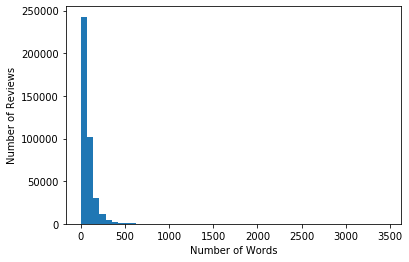

In [151]:
plt.hist(words_per_sentence, bins=50);
plt.xlabel("Number of Words");
plt.ylabel("Number of Reviews");

In [152]:
df_standardized.text.values[:20]

array([list(['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'my', 'labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most']),
       list(['product', 'arrived', 'labeled', 'as', 'jumbo', 'salted', 'peanuts', 'the', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', 'not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', 'jumbo']),
       list(['this', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', 'it', 'is', 'a', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', 'in', 'this', 'case', 'filberts', 'and', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'libe

In [153]:
df_standardized.to_csv("data/df_cleaned.csv")